# Планирование рекламных компаний для магазина компьютерных игр на 2017 год #

## Описание проекта ##

Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Описание данных ##

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Подготовка и обработка данных ##

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Осуществим первичное знакомство с данными: выясним тип данных, уникальные значения, количество пропусков

In [3]:
#Создадим функцию для описания данных
def describe_cols(data):
    
    values = pd.DataFrame()
    
    for col in data.columns:
        values[col] = [data[col].unique(), data[col].dtypes, data[col].nunique()]
        
    return values.transpose().sort_values(by=1, ascending=True).rename({0: 'Значения', 1: 'тип данных', 2: 'Кол-во уникальных значений'}, axis=1)

describe_cols(data)

,Значения,тип данных,Кол-во уникальных значений
Year_of_Release,"[2006.0, 1985.0, 2008.0, 2009.0, 1996.0, 1989....",float64,37
NA_sales,"[41.36, 29.08, 15.68, 15.61, 11.27, 23.2, 11.2...",float64,402
EU_sales,"[28.96, 3.58, 12.76, 10.93, 8.89, 2.26, 9.14, ...",float64,307
JP_sales,"[3.77, 6.81, 3.79, 3.28, 10.22, 4.22, 6.5, 2.9...",float64,244
Other_sales,"[8.45, 0.77, 3.29, 2.95, 1.0, 0.58, 2.88, 2.84...",float64,155
Critic_Score,"[76.0, nan, 82.0, 80.0, 89.0, 58.0, 87.0, 91.0...",float64,82
Name,"[Wii Sports, Super Mario Bros., Mario Kart Wii...",object,11559
Platform,"[Wii, NES, GB, DS, X360, PS3, PS2, SNES, GBA, ...",object,31
Genre,"[Sports, Platform, Racing, Role-Playing, Puzzl...",object,12
User_Score,"[8, nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7....",object,96


In [4]:
#Создадим функцию для поиска и подсчета пропусков в столбцах
def nan_values(data):
    count_missing = data.isna().sum()
    percent_missing = round(data.isna().sum() * 100 / len(data), 2)
    
    missing_value_data = pd.DataFrame({'column_name': data.columns,
                                     'num_missing': count_missing,
                                     'percent_missing': percent_missing})
    
    return missing_value_data
nan_values(data)

,column_name,num_missing,percent_missing
Name,Name,2,0.01
Platform,Platform,0,0.00
Year_of_Release,Year_of_Release,269,1.61
Genre,Genre,2,0.01
NA_sales,NA_sales,0,0.00
EU_sales,EU_sales,0,0.00
JP_sales,JP_sales,0,0.00
Other_sales,Other_sales,0,0.00
Critic_Score,Critic_Score,8578,51.32
User_Score,User_Score,6701,40.09


В данным имеются пропуски. Больше всего пропусках в столбцах с оценкой критиков, оценкой пользователей и рейтингом. В первую очередь необходимо привести наименования столбцов к нижнему регистру.

In [5]:
data.columns=map(str.lower,data.columns)

Исследуем пропуски по столбцам и заполним их.

In [6]:
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В данном столбце всего два пропуска, при этом, если смотреть на другие столбцы, то в них также имеются пропуски. Учитывая, что данные две строки описывают игры 1993 года, а также то, что имеется много пропусках в иных столбцах - удалим данные строки

In [7]:
data.dropna(subset = ['name'], inplace = True)

Изучим стоблбце user_score, рассмотрев все уникальные значения

In [8]:
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В данных помимо пропусков имеется аббревиатура tbd. В игровой индустрии данная аббревиатура обозначает "to be determined", что означает, что в настоящий момент у данной игры нет оценки, однако она будет выставлена позднее

В столбце имеется большое количество пропусков, а также значения "tbd". Удаление строк с такими значениями приведет к значительному ухудшению качества данных, в виду чего можно заменить данные значения на несвойственные, и учитывать эти данные
Вместе с этим изменим тип данных в данном столбце на числовой, для упрощения дальнейших расчетов, а также потому что после внесенных замен, оценка будет представлять собой исключительно числовые значения

In [9]:
data.loc[data['user_score'].isna(),'user_score']=-1

In [10]:
data.loc[data['user_score']=='tbd']=-1
data['user_score']=pd.to_numeric(data['user_score'])

Аналогичная ситуация в столбцах year_of_release, critic_score и rating. При этом значение года является челочисленным, поэтому поменяем тип данных в данном столбце на int

In [11]:
data.loc[data['year_of_release'].isna(),'year_of_release']=-1

In [12]:
data['year_of_release']=data['year_of_release'].astype(int)

In [13]:
data.loc[data['critic_score'].isna(),'critic_score']=-1

data.loc[data['rating'].isna(),'rating']=-1

Проверим наличие пропусков после проведенных действий

In [14]:
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Создадим новый столбец, в котором будут указаны общие продажи игры вне зависимости от региона, который потребуется для дальнешего исследования

In [15]:
data['sum_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']

### Вывод ###

Данные обладали большим количеством пропусков, некоторые столбцы имели не свойственный тип данных. В результате обработки пропуски заполненны несвойственными значениями, с целью сохранения данных и использования их в анализе. Также столбцы были приведены к нижнему регистру и добавлен необходимый для дальнейшего исследования столбец с суммарным количеством продаж по всем регионам.

## Исследовательский анализ данных ##

Исследуем количество игр в разрезе по годам. Учитывая, что нам необходимы актуальные данные, сразу будем анализировать сведения позднее 2000 года. На основании полученного исследования более точно определим промежуток времени, при котором данные будут являться актуальными.

In [16]:
data.groupby('year_of_release')['sum_sales'].sum()

year_of_release
-1      -7190.68
 1980      11.26
 1981      35.36
 1982      28.57
 1983      16.66
 1984      49.65
 1985      53.03
 1986      35.15
 1987      21.50
 1988      46.22
 1989      71.95
 1990      47.97
 1991      31.49
 1992      74.51
 1993      45.10
 1994      77.03
 1995      85.48
 1996     191.46
 1997     191.89
 1998     245.30
 1999     236.94
 2000     177.26
 2001     289.87
 2002     343.37
 2003     317.79
 2004     350.07
 2005     399.62
 2006     449.62
 2007     488.96
 2008     527.31
 2009     515.03
 2010     466.81
 2011     420.93
 2012     317.53
 2013     321.67
 2014     291.77
 2015     235.06
 2016     113.89
Name: sum_sales, dtype: float64

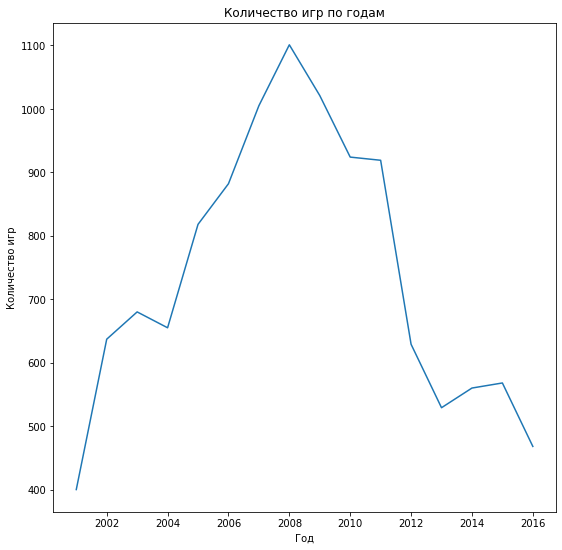

In [17]:
year_analyse=data.query('year_of_release>2000').groupby('year_of_release')['name'].count()
year_analyse.plot(title='Количество игр по годам',figsize=(9,9),xlabel='Год',ylabel='Количество игр');


Судя по графику, наибольшее количество игр было издано в промежуток с 2004 по 2013 год. Построим сводную таблицу с разбивкой по годам и платформам.

In [18]:
data.query('year_of_release>2000').pivot_table(index='platform',columns='year_of_release',values='name',aggfunc='count',fill_value='-')

year_of_release,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,
3DS,-,-,-,-,-,-,-,-,-,-,91.0,89.0,87.0,71.0,77.0,43.0
DC,8.0,1.0,-,-,-,-,1.0,1.0,-,-,-,-,-,-,-,-
DS,-,-,-,22.0,101.0,166.0,273.0,309.0,217.0,179.0,91.0,15.0,3.0,-,-,-
GB,10.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
GBA,63.0,115.0,114.0,127.0,98.0,30.0,5.0,-,-,-,-,-,-,-,-,-
GC,20.0,116.0,125.0,68.0,79.0,32.0,2.0,-,-,-,-,-,-,-,-,-
N64,9.0,1.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-
PC,15.0,18.0,33.0,30.0,36.0,50.0,60.0,69.0,96.0,84.0,126.0,61.0,38.0,46.0,48.0,52.0
PS,82.0,20.0,3.0,-,-,-,-,-,-,-,-,-,-,-,-,-


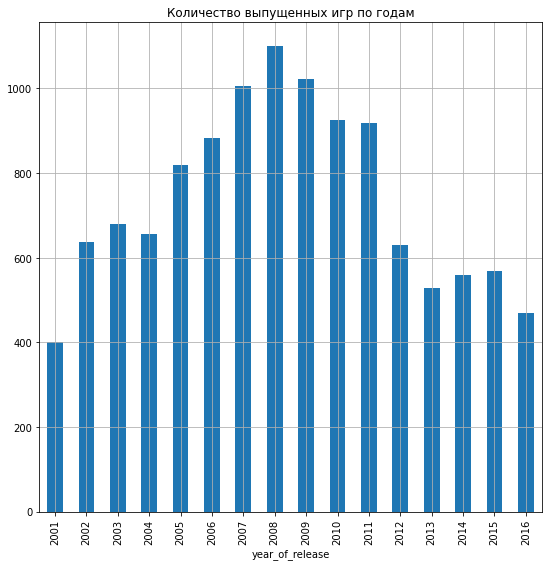

In [19]:
year_analyse.plot(x='year_of_release',y='name',grid=True,kind='bar',title="Количество выпущенных игр по годам",figsize=(9,9));

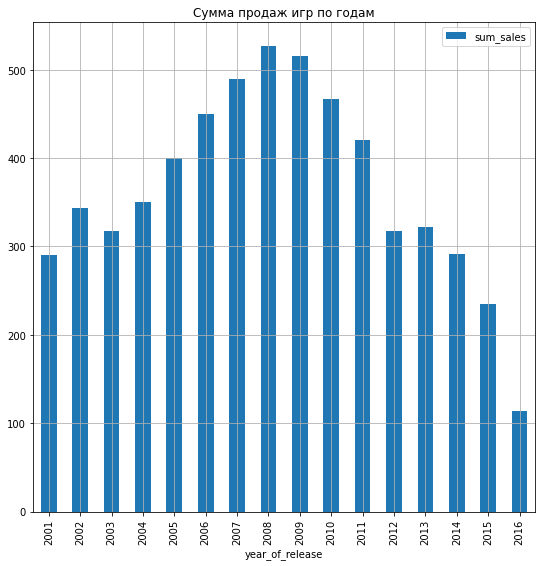

In [20]:
year_sales=data.query('year_of_release>2000').groupby('year_of_release')['sum_sales'].sum().reset_index()
year_sales.plot(x='year_of_release',y='sum_sales',grid=True,kind='bar',title="Сумма продаж игр по годам",figsize=(9,9));

Исходя из полученных данных наблюдается смена поколений платформ в 2007 году и в 2012-2013 годах. Также наблюдается резкий спад игрового рынка в период с 2008 по 2012 год. Основываясь на этих сведения, наиболее актуальными являются сведения начиная с 2013 года, когда вышли новые платформы.

In [21]:
data=data.query('year_of_release>=2013')

Определим платформы с наибольшими суммарными продажами

In [22]:
platform_sales=data.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).reset_index().head(10)

In [23]:
platform_sales

,platform,sum_sales
0,PS4,265.67
1,PS3,153.48
2,XOne,144.54
3,3DS,135.52
4,X360,123.44
5,WiiU,59.58
6,PC,36.38
7,PSV,29.46
8,Wii,9.97
9,PSP,3.46


Создадим список из первых самых прибыльных платформ, после чего сделаем срез данных только по этим платформам и изучим его

In [24]:
top_platform_list=platform_sales['platform'].to_list()

In [25]:
top_platform_list

['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP']

In [26]:
top_platform_data=data.query('platform in @top_platform_list')
top_platform_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,17.09
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,14.86
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,-1,12.25
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,-1,13.82
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,10.65
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,0.01


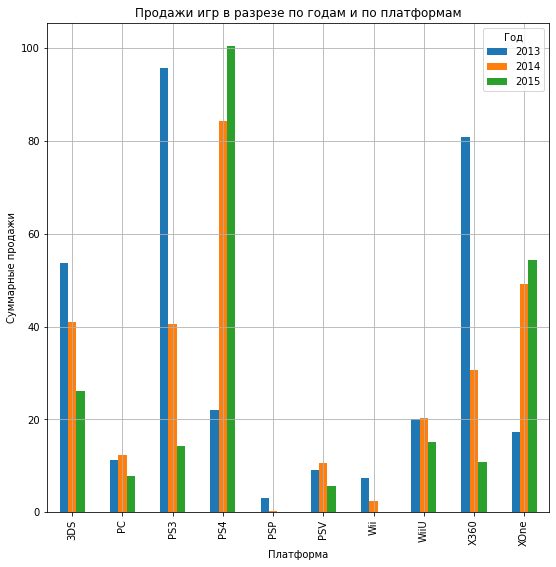

In [27]:
top_platform_data.pivot_table(index='platform',columns='year_of_release',values='sum_sales',aggfunc='sum',fill_value='-').plot(kind='bar',figsize=(9,9),title='Продажи игр в разрезе по годам и по платформам',xlabel='Платформа',ylabel='Суммарные продажи',grid=True)
plt.legend(title='Год');

Наибольшими продажами выделяется PS4 и XOne, что обусловлено тем, что данные платформы относительно недавно на рынке и большенство игр выпускается именно для них и именно у этих платформ продажи растут с каждым годом.

Изучим разброс выручки на различных платформах

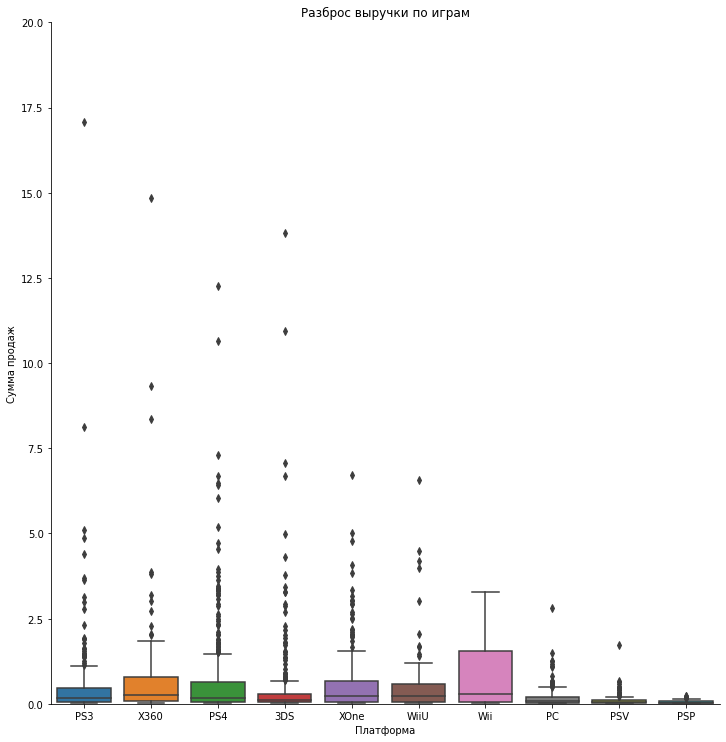

In [28]:
sns.catplot(x='platform',y='sum_sales',kind='box',data=top_platform_data,height=10)
plt.ylim([0,20])
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
plt.title('Разброс выручки по играм')
plt.show()

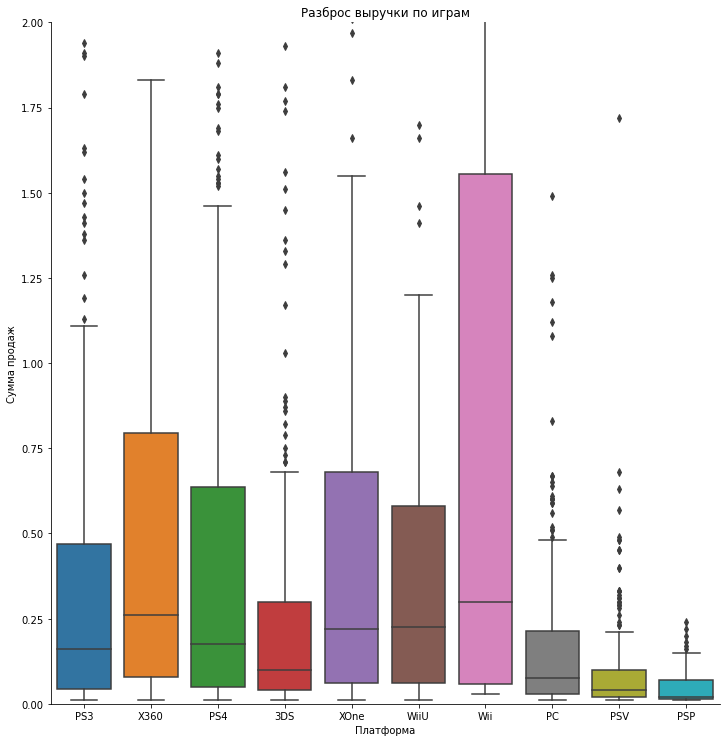

In [29]:
sns.catplot(x='platform',y='sum_sales',kind='box',data=top_platform_data,height=10)
plt.ylim([0,2])
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
plt.title('Разброс выручки по играм')
plt.show()

Нормальные значения по всем платформам, кроме Wii не превышают 2 млн, при этом имеется огромное количество выбросов вплоть до 17,5 млн. Платформы с наибольшим значением медианы и диапазоном нормальных значений - Wii и X360, наименьшие - PSP и PSV. 

Рассмотрим влияние оценок критиков и пользователей на продажи на примере самой прибыльной платформы Xbox360

In [30]:
data_x360=data.query('platform=="X360" and critic_score!=-1 and user_score!=-1')
data_x360['sum_sales'].corr(data_x360['critic_score'])

0.3504305787216835

Text(0.5, 1.0, 'Диаграмма рассеивания Оценка критиков\\Уровень продаж X360')

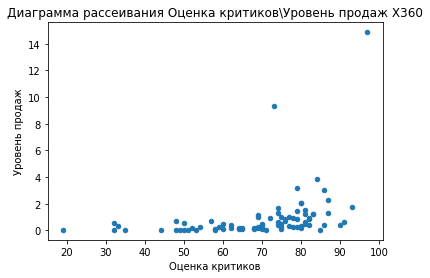

In [31]:
data_x360.plot('critic_score','sum_sales',kind='scatter',);
plt.xlabel('Оценка критиков') 
plt.ylabel('Уровень продаж')
plt.title('Диаграмма рассеивания Оценка критиков\Уровень продаж X360')

In [32]:
data_x360['sum_sales'].corr(data_x360['user_score'])

-0.005619646382532603

Text(0.5, 1.0, 'Диаграмма рассеивания Оценка пользователей\\Уровень продаж X360')

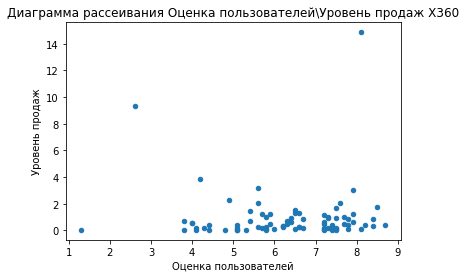

In [33]:
data_x360.plot('user_score','sum_sales',kind='scatter',);
plt.xlabel('Оценка пользователей') 
plt.ylabel('Уровень продаж')
plt.title('Диаграмма рассеивания Оценка пользователей\Уровень продаж X360')

Исходя из полученных данных можно сделать вывод, что оценки пользователей практически не влияют на уровень продаж, в отличии от оценки критиков, которая имеет коэффициент корреляции с уровнем продаж 0.35.

Проверим уровень влияния оценок на всех платформах.

In [34]:
data_score=data.query('critic_score!=-1 and user_score!=-1')

In [35]:
data_score['sum_sales'].corr(data_score['critic_score'])

0.3146923903436915

Text(0.5, 1.0, 'Диаграмма рассеивания Оценка критиков\\Уровень продаж')

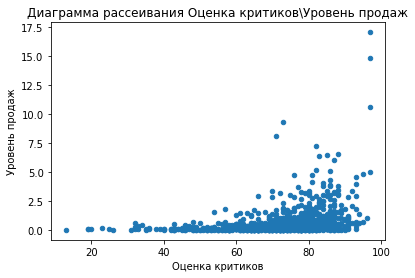

In [36]:
data_score.plot('critic_score','sum_sales',kind='scatter',);
plt.xlabel('Оценка критиков') 
plt.ylabel('Уровень продаж')
plt.title('Диаграмма рассеивания Оценка критиков\Уровень продаж')

In [37]:
data_score['sum_sales'].corr(data_score['user_score'])

-0.0028397010015255263

Text(0.5, 1.0, 'Диаграмма рассеивания Оценка пользователей\\Уровень продаж')

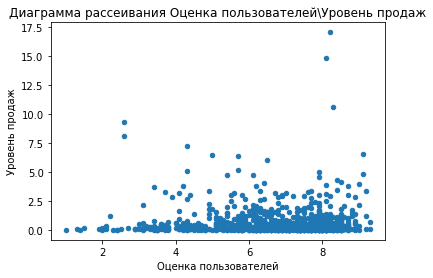

In [38]:
data_score.plot('user_score','sum_sales',kind='scatter');
plt.xlabel('Оценка пользователей') 
plt.ylabel('Уровень продаж')
plt.title('Диаграмма рассеивания Оценка пользователей\Уровень продаж')

При рассмотрении данных по всем платформам факт того, что оценки критиков больше влияют на уровень продаж, чем оценки пользователей, также подтверждается. При этом в разрезе конкретной платформы Xbox360, разница вовлиянии больше, чем по всем платформам.
Также с уверенностью можно утверждать, что выручка увеличивается при оценке критиков более 70.

Рассмотрим прибыльность игр в разрезе по жанрам, для этого рассмотрим медианные значения каждого из жанров, так как оно наиболее точно позволит оценить стабильность покупки игр того или иного жанра.

In [39]:
data.pivot_table(index='genre',values='sum_sales',aggfunc='median').sort_values(by='sum_sales',ascending=False)

,sum_sales
genre,
Shooter,0.450
Sports,0.260
Platform,0.220
Fighting,0.120
Role-Playing,0.120
Racing,0.115
Action,0.110
Misc,0.110
Simulation,0.095


Явным лидером по продажам является жанр Shooter, при этом самыми убыточными жанрами являются Strategy и Adventure

### Вывод ###

В 2007 году и в 2012-2013 годах наблюдается смена поколений платформ. Также наблюдается резкий спад игрового рынка в период с 2008 по 2012 год. Основываясь на этих сведения, наиболее актуальными являются сведения начиная с 2013 года.
Самыми прибыльными платформами являются PS4, PS3, XOne, 3DS, X360, WiiU, PC, PSV, Wii, PSP.

Наибольшими продажами выделяется PS4 и XOne, что обусловлено тем, что данные платформы относительно недавно на рынке и большенство игр выпускается именно для них и именно у этих платформ продажи растут с каждым годом.

Нормальные значения по всем платформам, кроме Wii не превышают 2 млн, при этом имеется огромное количество выбросов вплоть до 17,5 млн. Платформы с наибольшим значением медианы и диапазоном нормальных значений - Wii и X360, наименьшие - PSP и PSV, что свидетельствует о неравномерности прибыли для различных игр и платформ.

Оценки пользователей практически не влияют на уровень продаж, в отличии от оценки критиков, которая имеет коэффициент корреляции с уровнем продаж 0.31. Также с уверенностью можно утверждать, что выручка увеличивается при оценке критиков более 70.

Явным лидером по продажам является жанр Shooter, при этом самыми убыточными жанрами являются Strategy и Adventure.



## Составление протрета пользователя для каждого региона ##

Составим портрет пользователя для каждого региона

**Северная Америка**

In [40]:
data.groupby('platform')['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False).head(5)

,platform,na_sales
4,PS4,108.62
10,XOne,92.77
9,X360,80.90
3,PS3,63.27
0,3DS,37.71


In [41]:
data.groupby('genre')['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False).head(5)

,genre,na_sales
0,Action,124.66
8,Shooter,109.61
10,Sports,65.17
7,Role-Playing,46.40
3,Misc,26.64


In [42]:
data.query('rating!=-1').groupby('rating')['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False).head(5)

,rating,na_sales
2,M,165.15
0,E,78.24
1,E10+,51.97
3,T,49.60


В Северной Америке наиболее популярной платформой является PS4 и XOne - это самые новые платформы, их популярность скорее всего обеспечена их доступностью и производительностью.

Самым популярным жанром является Action.

Рейтинг игр также влияет на уровень продаж, так, наиболее популярны игры с рейтингом 'M' и 'E'.

**Европа**


In [43]:
data.groupby('platform')['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False).head(5)

,platform,eu_sales
4,PS4,141.09
3,PS3,67.23
10,XOne,51.43
9,X360,42.04
0,3DS,30.11


In [44]:
data.groupby('genre')['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False).head(5)

,genre,eu_sales
0,Action,116.44
8,Shooter,87.72
10,Sports,60.22
7,Role-Playing,36.97
6,Racing,20.09


In [45]:
data.query('rating!=-1').groupby('rating')['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False).head(5)

,rating,eu_sales
2,M,145.30
0,E,82.03
3,T,41.81
1,E10+,40.03


В Европе самой популярной платформой является PS4, на втором месте расположен PS3. Явная доминация Sony Playstation, скорее всего, обусловлено наличием эксклюзивов на данной платформе и большей доступностью для европейского рынка, чем Xbox.

Самым популярным жанром является Action.

Рейтинг игр также влияет на уровень продаж, так, наиболее популярны игры с рейтингом 'M' и 'E'.

**Япония**

In [46]:
data.groupby('platform')['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False).head(5)

,platform,jp_sales
0,3DS,67.70
3,PS3,22.98
6,PSV,18.48
4,PS4,15.96
8,WiiU,10.88


In [47]:
data.groupby('genre')['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False).head(5)

,genre,jp_sales
7,Role-Playing,51.04
0,Action,40.02
3,Misc,9.20
2,Fighting,7.62
8,Shooter,6.60


In [48]:
data.query('rating!=-1').groupby('rating')['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False).head(5)

,rating,jp_sales
3,T,20.12
0,E,15.14
2,M,14.11
1,E10+,5.76


В Японии наблюдается явное доминирование платформ японского изготовителя, первое место занимает Nintendo3DS. Следует также отметить, что данная платформа является портативной. Данный факт с большой вероятностью обусловлен японским менталитетом и образом жизни.<br>
На первом месте среди популярных жанров с большим отрывом находится Role-playing, что неудивительно, ведь в Японии RP составляющая представлена практически как отдельная культура.<br>
Лидирующие места по продажам в разрезе рейтинга занимают 'E' и 'T', что вполне логично, так как Nintendo в большинстве случаев выпускает игры именно такой категории.

### Вывод ###

**В Северной Америке** В Северной Америке наиболее популярной платформой является PS4 и XOne - это самые новые платформы, их популярность скорее всего обеспечена их доступностью и производительностью.
Самым популярным жанром является Action.
Рейтинг игр также влияет на уровень продаж, так, наиболее популярны игры с рейтингом 'M' и 'E'.

**В Европе** В Европе самой популярной платформой является PS4, на втором месте расположен PS3. Явная доминация Sony Playstation, скорее всего, обусловлено наличием эксклюзивов на данной платформе и большей доступностью для европейского рынка, чем Xbox.
Самым популярным жанром является Action.
Рейтинг игр также влияет на уровень продаж, так, наиболее популярны игры с рейтингом 'M' и 'E'.

**В Японии** В Японии наблюдается явное доминирование платформ японского изготовителя, первое место занимает Nintendo3DS. Следует также отметить, что данная платформа является портативной. Данный факт с большой вероятностью обусловлен японским менталитетом и образом жизни.<br>
На первом месте среди популярных жанров с большим отрывом находится Role-playing, что неудивительно, ведь в Японии RP составляющая представлена практически как отдельная культура.<br>
Лидирующие места по продажам в разрезе рейтинга занимают 'E' и 'T', что вполне логично, так как Nintendo в большинстве случаев выпускает игры именно такой категории.



## Проверка гипотез ##


### Сравнение рейтинга платформ Xbox One и PC ###

$H_0$ - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые<br>
$H_1$ - Средние пользовательские рейтинги платформ Xbox One b PC различаются

In [49]:
from scipy import stats as st
xone=data.query('platform=="XOne" and user_score!=-1')
pc=data.query('platform=="PC" and user_score!=-1')
alpha=.05
results = st.ttest_ind(xone['user_score'],pc['user_score'], equal_var = True)
print('p-значение: ', results.pvalue)
if results.pvalue<alpha:
    print('Гипотеза подтверждается')
else:
    print('Гипотеза не подтверждается')
    
print('Средний пользовательский рейтинг XboxOne:',xone['user_score'].mean().round(2))
print('Средний пользовательский рейтинг PC:',pc['user_score'].mean().round(2))               

p-значение:  0.14012658403611647
Гипотеза не подтверждается
Средний пользовательский рейтинг XboxOne: 6.52
Средний пользовательский рейтинг PC: 6.27


Средние пользовательские рейтинги XboxOne и PC не одинаковые.

### Сравнение средних пользовательских рейтингов жанров Action  и Sports. ###

$H_0$ - Средние пользовательские рейтинги жанров Action и Sports разные.<br>
$H_1$ - Средние пользовательские рейтинги жанров Action и Sports одинаковые


In [50]:
from scipy import stats as st
action=data.query('genre=="Action" and user_score!=-1')
sports=data.query('genre=="Sports" and user_score!=-1')
alpha=.05
results = st.ttest_ind(action['user_score'],sports['user_score'], equal_var = True)
print('p-значение: ', results.pvalue)
if results.pvalue<alpha:
    print('Гипотеза подтверждается')
else:
    print('Гипотеза не подтверждается')
    
print('Средний пользовательский рейтинг жанра Action:',action['user_score'].mean().round(2))
print('Средний пользовательский рейтинг жанра Sports:',sports['user_score'].mean().round(2))       

p-значение:  1.0517832389140023e-27
Гипотеза подтверждается
Средний пользовательский рейтинг жанра Action: 6.84
Средний пользовательский рейтинг жанра Sports: 5.24


Средние пользовательские рейтинги жанров Action и Sports разные.

### Вывод ###

При проверке гипотез получены следующие результаты:
1. Средние пользовательские рейтинги XboxOne и PC не одинаковые.
2. Средние пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод ##

В ходе исследования были проанализированы исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

Данные обладали большим количеством пропусков, некоторые столбцы имели не свойственный тип данных. В результате обработки пропуски заполненны несвойственными значениями, с целью сохранения данных и использования их в анализе. Также столбцы были приведены к нижнему регистру и добавлен необходимый для дальнейшего исследования столбец с суммарным количеством продаж по всем регионам.

В результате исследовательского анализа данных получены следующие результаты:
- В 2007 году и в 2012-2013 годах наблюдается смена поколений платформ. Также наблюдается резкий спад игрового рынка в период с 2008 по 2012 год. Основываясь на этих сведения, наиболее актуальными являются сведения начиная с 2013 года.

- Самыми прибыльными платформами являются PS4, PS3, XOne, 3DS, X360, WiiU, PC, PSV, Wii, PSP.

- Наибольшими продажами выделяется PS4 и XOne, что обусловлено тем, что данные платформы относительно недавно на рынке и большенство игр выпускается именно для них и именно у этих платформ продажи растут с каждым годом.
- Нормальные значения по всем платформам, кроме Wii не превышают 2 млн, при этом имеется огромное количество выбросов вплоть до 17,5 млн. Платформы с наибольшим значением медианы и диапазоном нормальных значений - Wii и X360, наименьшие - PSP и PSV, что свидетельствует о неравномерности прибыли для различных игр и платформ.
- Оценки пользователей практически не влияют на уровень продаж, в отличии от оценки критиков, которая имеет коэффициент корреляции с уровнем продаж 0.31. Также с уверенностью можно утверждать, что выручка увеличивается при оценке критиков более 70.
- Явным лидером по продажам является жанр Shooter, при этом самыми убыточными жанрами являются Strategy и Adventure.

Составлен портрет пользователя для каждого региона:
- **В Северной Америке** наиболее популярной платформой является PS4 и XOne - это самые новые платформы, их популярность скорее всего обеспечена их доступностью и производительностью.Самым популярным жанром является Action.Рейтинг игр также влияет на уровень продаж, так, наиболее популярны игры с рейтингом 'M' и 'E'.


- **В Европе** самой популярной платформой является PS4, на втором месте расположен PS3. Явная доминация Sony Playstation, скорее всего, обусловлено наличием эксклюзивов на данной платформе и большей доступностью для европейского рынка, чем Xbox.Самым популярным жанром является Action.Рейтинг игр также влияет на уровень продаж, так, наиболее популярны игры с рейтингом 'M' и 'E'.

- **В Японии** наблюдается явное доминирование платформ японского изготовителя, первое место занимает Nintendo3DS. Следует также отметить, что данная платформа является портативной. Данный факт с большой вероятностью обусловлен японским менталитетом и образом жизни.<br>На первом месте среди популярных жанров с большим отрывом находится Role-playing, что неудивительно, ведь в Японии RP составляющая представлена практически как отдельная культура.<br>Лидирующие места по продажам в разрезе рейтинга занимают 'E' и 'T', что вполне логично, так как Nintendo в большинстве случаев выпускает игры именно такой категории.


Осуществлена проверка двух гипотез:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
2. Средние пользовательские рейтинги жанров Action  и Sports разные.

В результате проверки гипотез получены следующие результаты:
1. Средние пользовательские рейтинги XboxOne и PC не одинаковые.
2. Средние пользовательские рейтинги жанров Action и Sports разные.

Планируя продажи компьютерных игр на 2017 год необходимо руководствоваться следующими положениями:
- Особое внимание необходимо уделять новым развивающимся платформам 3DS, PS4 и XOne, также в следующем году все еще будут актуальными платформы PS3 и X360.
- Необходимо сделать упор на реализацию игр с жанрами Action и Shooter.
- При планировании рекламных компаний необходимо создавать разные рекламные компании под различные регионы, так как на примере Японии явно видно, что предпочтения в зависимости от регионов могут быть диаметрально противоположные.
